# Biodiversity In U.S. National Parks

## Introduction

In this section, briefly describe:
- **Goal of the analysis** — What are you trying to achieve?
- **Key question(s)** — The main problem(s) or topic(s) you aim to answer.
- **Context or background** — Why this question matters, and any relevant domain info.

## Table of Contents
1. [Overview](#Introduction)

2. [Setup & Scope](#setup--scope)

3. [Data Exploration](#data)

4. [Analysis](#Analysis)

5. [Conclusions](#Conclusions)

## Setup & Scope 

This analysis is based on a dataset provided by Codecademy, inspired by information from the U.S. National Parks Service. 

It focuses on endangered species observed across various national parks and aims to uncover patterns in species vulnerability and distribution.

The following key questions guide the scope of this report:
- How does the distribution of conservation statuses vary across biological categories once unknown statuses are excluded?
- Which biological categories contain the highest number of at‑risk species when considering all known non‑positive conservation statuses?
- Which national parks have the greatest concentration of at‑risk species relative to the total species recorded there?
- How are at‑risk species and those in recovery distributed across parks?


## Python Libraries

In [50]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

## Data Exploration

### Observations
The observations fiie has the following columns:  
* Scientifc name - the scientific name of the animal/plant
* park name - name of the park 
* observations - number of observations of the creature/plant in the park, with values between 109 and 563 

In [51]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85



species_info: a file with data about each creature:

 * Category - the category that the animal/plant belongs to - (Bird/Mammal/Plant/etc)
 * Scientific name - the scientific name of the animal
 * Common names - the common names for the animal/plant 
 * Conservation status - the status of conservation - can be Endangered, Threatend,   


In [52]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN



By examining the species_info file we can notice that we have several scientific name duplicates,

for example canis lupus appears three times with different converstaion status, Vireo solitarius appears twice, one with two common names. 

Also, the conversation status has nan values for not endagered species, so thee is a need to replace it with a non endangered string instead. 

By using dtypes, info and describe we can confirm that except the observations which is an int, 

all the other variables are objects, matching the categorical variables in all those categories. 


## Cleaning and formatting the Data:

observations: By going over the data found several identical observations, meaning same scientific name, 

same park, same number of observations,  since there are not timestamps or any other discerning metric, 

i treated them as duplicates and removed them. No nan values where found. 

species_info: Here its more complex. There are several rows with the same category and scientific name,

but can have different or more than one common name and different conservation status. Since common names is not an analyzable parameter, i ingored it and decided 

to keep the last row that appears in the csv, where the reasoning is that this is the latest updated entry to the file, which lacks any kind of timestamps to 
 
confirm or deny. 

The Conservation Status column contains 5,633 missing values (NaNs), indicating that no data is available for the conservation status of these species. 

I replaced these missing entries with the label "No Intervention" to maintain consistency in the dataset. However, this substitution limits our ability to accurately 

interpret or infer the true conservation status of these species, especially given the small sample size relative to the broader population. The absence of 

conservation status for certain species is often not missing at random, as it reflects underlying biases in research attention and resource allocation.

for observation amount based analysis i add a column of each secientific name sum of total observations in the observations.csv file. 

In [53]:
## Check for missing values
observations.isnull().sum()
species.isnull().sum()
print(species['scientific_name'].dtypes)
# check for duplicates in the 'observations' DataFrame
# print(observations.duplicated(keep=False).sum())

# drop the duplicated rows
observations.drop_duplicates(inplace=True)

# fill NaN values in the 'conservation_status' column with 'Unknown'
species['conservation_status'] = species['conservation_status'].fillna('Unknown') 

# Clean park names by removing 'National Park' suffix
observations['park_name'] = observations['park_name'].str.replace(' National Park', '', regex=True)
# check for duplicates in the 'species_info' DataFrame - where category and scientific_name are the same
dup_mask = species[species.duplicated(subset=["category", "scientific_name"], keep=False)].sort_values(by=["scientific_name"])
species = species.drop_duplicates(subset=["category", "scientific_name"], keep='last')

# Count the number of observations for each species and add it to the species DataFrame 
obs_counts = observations.groupby('scientific_name')['observations'].sum()
species['observations'] = species['scientific_name'].map(obs_counts)

object


## Data Exploartion

There are 23281 rows in the observations file, with 5541 unique species and 4 parks. 

The most observerd species is the Holcus lanatus with 1780 observations across all parks. 

The least observed species is Grus americana with only 131 observations across all parks. 

The observetions per park are distributes equaly, each park is about 25% of all the sample size. 

The observations per species are also distributed equally, each one gets about 0.01% of the sample size. 

In [54]:
parks = observations["park_name"].unique()

print(f"Total observations {observations.shape[0]}")
print(f"Most observed Species: {observations.groupby('scientific_name')['observations'].sum().idxmax()} with {observations.groupby('scientific_name')['observations'].sum().max()} observations in total")
print(f"Least observerd Species: {observations.groupby('scientific_name')['observations'].sum().idxmin()} with {observations.groupby('scientific_name')['observations'].sum().min()} observations in total")
print(f"Total number of unique species: {observations.scientific_name.nunique()}")
print(f"Total number of parks: {observations.park_name.nunique()}")
print(f"park observations distribution:\n{observations.park_name.value_counts(normalize=True)*100}")
print(f"species distribution:\n{observations.scientific_name.value_counts(normalize=True).sort_index()*100}")

Total observations 23281
Most observed Species: Holcus lanatus with 1780 observations in total
Least observerd Species: Grus americana with 131 observations in total
Total number of unique species: 5541
Total number of parks: 4
park observations distribution:
park_name
Bryce                    25.011812
Yosemite                 25.003222
Yellowstone              24.994631
Great Smoky Mountains    24.990335
Name: proportion, dtype: float64
species distribution:
scientific_name
Abies bifolia                          0.017181
Abies concolor                         0.017181
Abies fraseri                          0.017181
Abietinella abietina                   0.017181
Abronia ammophila                      0.017181
                                         ...   
Zonotrichia leucophrys gambelii        0.017181
Zonotrichia leucophrys oriantha        0.017181
Zonotrichia querula                    0.017181
Zygodon viridissimus                   0.017181
Zygodon viridissimus var. rupestris    

The species dataset contains 5,541 distinct species across seven types, with five possible conservation status categories.

Vascular plants comprise the majority of the data, making up 76.9% of all entries, while other categories—such as fish, amphibians, and reptiles—each account for 

only 1–2%, suggesting a strong sampling bias. This imbalance may stem from geographic factors favoring plant-rich environments, researcher focus on flora, or the 

relative ease of cataloging stationary organisms compared to mobile or elusive fauna. 

Since 96.7% of conservation status data is missing, it's unlikely to be Missing At Random (MAR). It’s more likely Not Missing At Random (NMAR), meaning the absence

of data may be tied to the actual status itself—like rare or unassessed species being less likely to have information.

Instead of just endangered, i will be assesing the data for 'at-risk' status species, meaning all those which have the following labels "species of concern, thretend, and endangered.



In [55]:
print(f"number of Species {species.shape[0]}")
print(f"types of Species: {species.category.nunique()}")
print(f"types of Species: {species.conservation_status.unique()}")
print(species.category.value_counts(normalize=True)*100)
print(species.conservation_status.value_counts(normalize=True)*100)

number of Species 5541
types of Species: 7
types of Species: ['Unknown' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
category
Vascular Plant       76.917524
Bird                  8.807075
Nonvascular Plant     6.009746
Mammal                3.176322
Fish                  2.255910
Amphibian             1.425735
Reptile               1.407688
Name: proportion, dtype: float64
conservation_status
Unknown               96.769536
Species of Concern     2.725140
Endangered             0.270709
Threatened             0.180473
In Recovery            0.054142
Name: proportion, dtype: float64


## Analysis

### Status Distribution Analysis

To understand the distribution of conservation statuses across all biological categories, we examined the number of species in each status.

Because a large proportion of the dataset is labeled as **“Unknown”** or contains missing values, these entries were excluded to focus on how the known statuses vary.

After removing “Unknown,” the breakdown reveals a pronounced imbalance:

- **Species of Concern** represent **84.4%** of all remaining cases, making it the most common status by a wide margin.
- Other categories, such as **Threatened** and **Endangered**, occur far less frequently.
- **In Recovery** is included but is the least represented status in the dataset.

This distribution is heavily **left‑skewed**, driven by the dominance of *Species of Concern* and the minimal presence of *In Recovery*.

When combined with the large number of excluded “Unknown” statuses, these results confirm the classification and sampling biases first suspected during the data exploration stage.

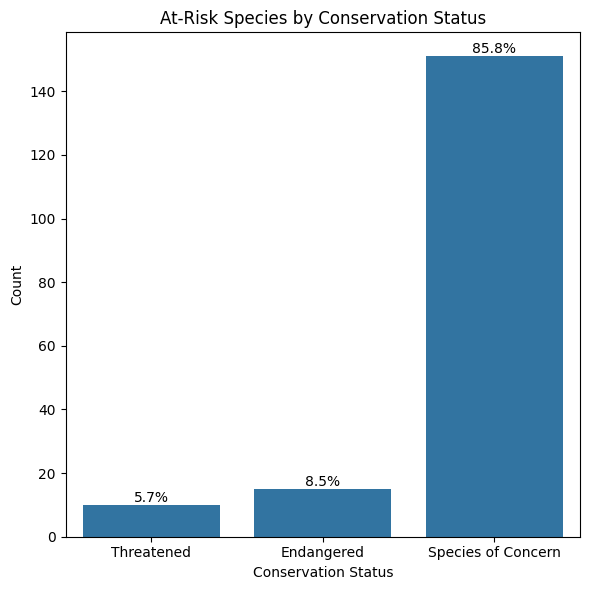

In [56]:

at_risk_species_df = species[
    ~species['conservation_status'].isin(['Unknown', 'In Recovery'])
][['scientific_name', 'category', 'conservation_status', 'observations']]

at_risk_summary = (
    at_risk_species_df
    .groupby('conservation_status')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=True)
)

at_risk_summary['pct'] = at_risk_summary['count'] / at_risk_summary['count'].sum() * 100

plt.figure(figsize=(6, 6))
ax = sns.barplot(
    data=at_risk_summary,
    x='conservation_status',
    y='count',
    order=at_risk_summary['conservation_status']
)

for bar, pct in zip(ax.containers[0], at_risk_summary['pct']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y, f"{pct:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("At-Risk Species by Conservation Status")
plt.ylabel("Count")
plt.xlabel("Conservation Status")
plt.tight_layout()
plt.show()


## At‑Risk vs. Biological Categories Analysis

Birds represent the **highest number of at‑risk species**, with **72** individuals — clearly more than any other biological category.

This dominance suggests that avian species in the surveyed areas may be especially vulnerable, 

potentially due to habitat loss, migration pressures, or sensitivity to environmental change. 

**Vascular plants** (**46** species) and **mammals** (**30** species) follow at a moderate level, 

indicating that conservation priorities should not be limited to fauna alone — plant diversity appears under notable pressure as well.

All remaining categories show comparatively low totals, which could be setm from gaps in observation 

or reflect true lower vulnerability in those groups or reporting.

Consistent with earlier findings, **‘Species of Concern’** continues to dominate across nearly every category, 

highlighting that most at‑risk listings here are not yet classified as endangered or threatened,

but may be trending toward greater risk without intervention.

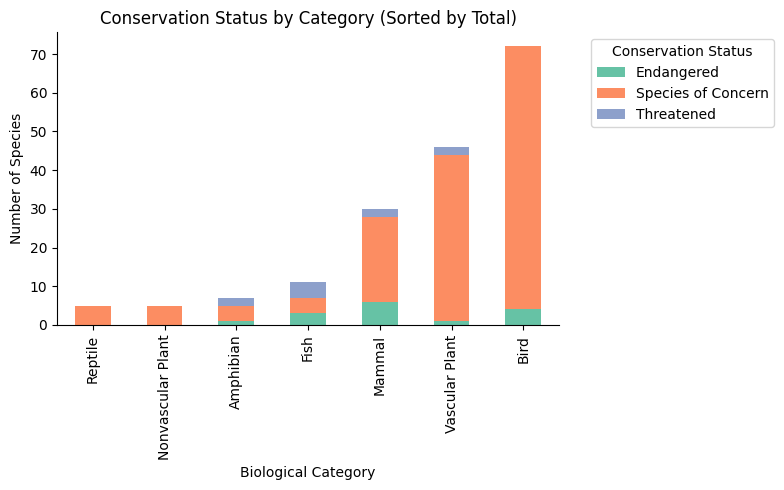

In [57]:
cat_status_counts = (
    at_risk_species_df
    .groupby(['category', 'conservation_status'])
    .size()
    .reset_index(name='count')
)

# Order categories by total count
order = (
    cat_status_counts.groupby('category')['count']
    .sum()
    .sort_values(ascending=True)
    .index
)

# Pivot to wide format in sorted category order
pivot_df = cat_status_counts.pivot(
    index='category',
    columns='conservation_status',
    values='count'
).fillna(0).loc[order]

# Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette("Set2", n_colors=len(pivot_df.columns)),
    figsize=(8, 5)
)

plt.ylabel('Number of Species')
plt.xlabel('Biological Category')
plt.title('Conservation Status by Category (Sorted by Total)')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

## At‑Risk Species by Park Analysis

Different national parks provide unique habitats that shape the variety of plants and animals found within them.

By comparing the data, we can identify which parks support a greater proportion of endangered species relative to all recorded observations.

The results show that **Yellowstone** accounts for the largest share of endangered species observations at **43%**, 

followed by **Yosemite** at **26%**, **Bryce** at **18%**, and **Great Smoky Mountains** at **12%**.

Because each park’s observation count is the same, these percentages directly represent the share of at‑risk species in relation to all observations,

highlighting Yellowstone’s notably greater concentration of at‑risk wildlife.

at_risk_species_by_park:
               park_name    sum  percentage
2            Yellowstone  38476   43.369854
3               Yosemite  23147   26.091122
0                  Bryce  16005   18.040714
1  Great Smoky Mountains  11088   12.498309



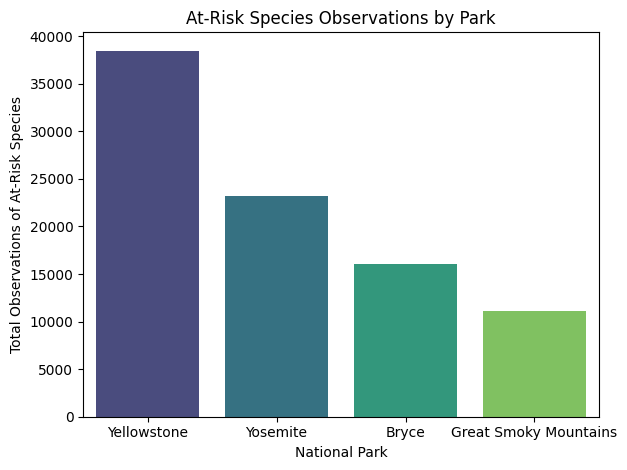

In [58]:
# Filter observations to *all at-risk* species
at_risk_species_by_park = observations[
    observations['scientific_name'].isin(at_risk_species_df['scientific_name'])
].groupby('park_name')['observations'].sum().reset_index(name='sum') \
 .sort_values(by='sum', ascending=False)


# Percentage of total observations that are at-risk
at_risk_species_by_park['percentage'] = (
    at_risk_species_by_park['sum'] * 100 / at_risk_species_by_park['sum'].sum()
)

print(f"at_risk_species_by_park:\n{at_risk_species_by_park}\n")

# Plot
sns.barplot(
    data=at_risk_species_by_park,
    x='park_name',
    y='sum',
    palette='viridis',
    hue='park_name'
)
plt.title('At-Risk Species Observations by Park')
plt.xlabel('National Park')
plt.ylabel('Total Observations of At-Risk Species')
plt.tight_layout()
plt.show()

## Most Frequently Observed At‑Risk Species by Park

Across four national parks, the top five most at-risk species are exclusively birds and mammals, with bats making up the majority of mammals.
Myotis lucifugus (Little brown bat) appears in all parks, while other bat species and the osprey show up in three. 
Only one park lists a non-bat mammal—a badger. 
This pattern highlights bats as the most consistently vulnerable group, signaling widespread ecological stress.


                                scientific_name              park_name  \
24                             Zizia trifoliata               Yosemite   
36             Camissonia sierrae ssp. alticola                  Bryce   
71                             Tofieldia glabra  Great Smoky Mountains   
94                           Accipiter cooperii                  Bryce   
118    Dichanthelium acuminatum var. acuminatum               Yosemite   
...                                         ...                    ...   
23138                          Eptesicus fuscus                  Bryce   
23153                             Myotis leibii            Yellowstone   
23204                 Lasionycteris noctivagans                  Bryce   
23215                             Sorex preblei            Yellowstone   
23249                       Melospiza lincolnii  Great Smoky Mountains   

       observations  
24              135  
36               84  
71               75  
94               95  
1

C:\Users\Yoav\AppData\Local\Temp\ipykernel_18724\228781998.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set2")(np.linspace(0, 1, len(d)))


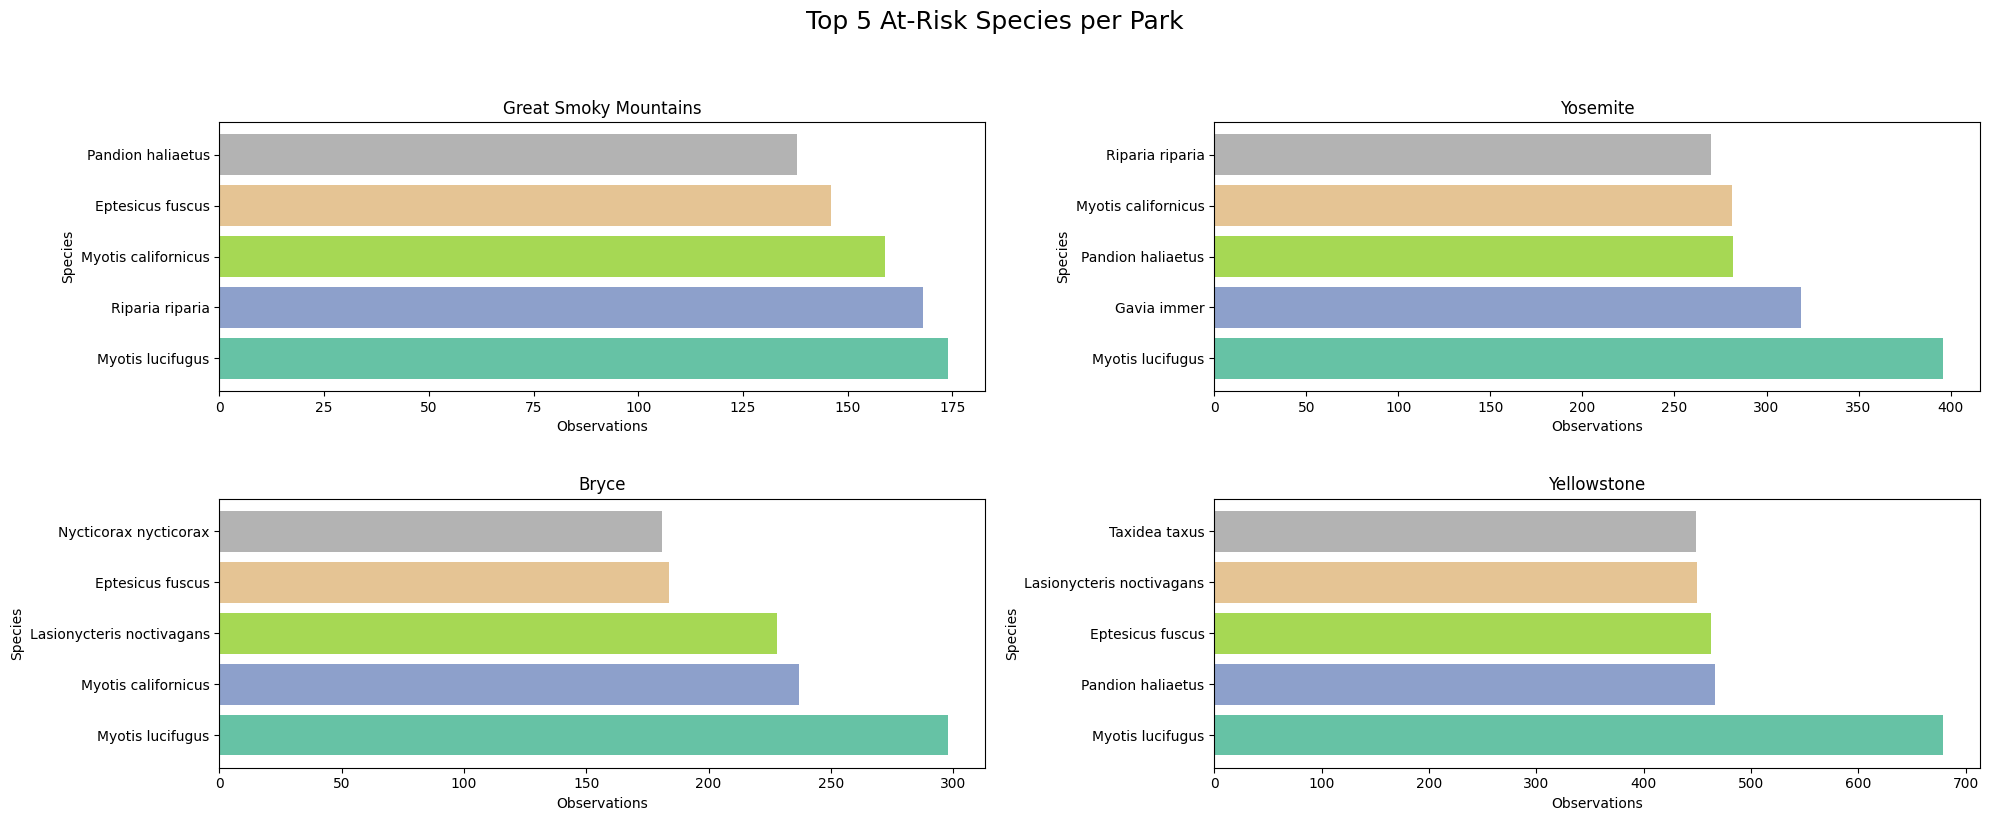

In [ ]:
# Filter observations to at-risk species
at_risk_obs = observations[
    observations['scientific_name'].isin(at_risk_species_df['scientific_name'])
]
# Group by park and species, summing observations
plot_data = (
    at_risk_obs
    .groupby(['park_name', 'scientific_name'])['observations']
    .sum()
    .reset_index()
    .sort_values(['park_name', 'observations'], ascending=[True, False])
    .groupby('park_name')
    .head(5)
)

print(at_risk_obs)

plt.figure(figsize=(20, 8))

for i, park in enumerate(parks, start=1):
    plt.subplot(2, 2, i)
    d = plot_data[plot_data['park_name'] == park]
    colors = plt.cm.get_cmap("Set2")(np.linspace(0, 1, len(d)))
    plt.barh(d['scientific_name'], d['observations'], color=colors)
    plt.title(park)
    plt.xlabel("Observations")
    plt.ylabel("Species")

plt.suptitle("Top 5 At-Risk Species per Park", fontsize=18, y=1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.88)
plt.show()



# Bat species analysis

Of the 16 bat species recorded, 8 have an unknown conservation status, 6 are listed as species of concern, 

1 is threatened, and 1 is endangered—indicating that at least half are at risk. 

When comparing total observations, species of concern account for over 4,100 sightings, while those with unknown status exceed 5,800. 

This suggests that even frequently observed bats may still face significant threats, reinforcing the need for clearer conservation assessments and targeted 

protection efforts.

The chart below reveals a right-skewed distribution, with most bat species concentrated in the "Unknown" and "Species of Concern" categories,

indicating that conservation uncertainty and ecological vulnerability are widespread despite varying observation counts.

Text(0.5, 1.0, 'Bat Species Observations by Conservation Status')

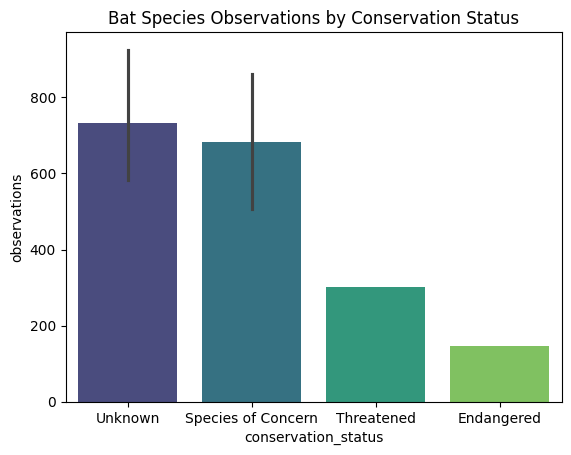

In [91]:
bats = species[species['common_names'].str.contains('Bat', case=True, na=False)]
# bats.conservation_status.value_counts()
bats

sns.barplot(
    data=bats,
    x='conservation_status',
    y='observations',
    order=bats['conservation_status'].value_counts().index,
    palette='viridis',
    hue='conservation_status',
)
plt.title('Bat Species Observations by Conservation Status')

## Conclusions

Summarize:
- **Main takeaway** — The answer to your original question.
- **Implications** — How results could be used or acted upon.
- **Limitations** — Gaps in data, assumptions, or methods.
- **Next steps** — Further analyses, data to collect, or experiments to run.
